In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

!pip install category_encoders
import category_encoders as ce

df = pd.read_csv('/content/crop_yield_dataset.csv')

df.head()

,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,Wheat,Peaty,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,Corn,Loamy,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,Rice,Peaty,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,Barley,Sandy,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,Soybean,Peaty,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)

df.describe()


Dataset Shape: (36520, 12)

Missing Values:
 Date            0
Crop_Type       0
Soil_Type       0
Soil_pH         0
Temperature     0
Humidity        0
Wind_Speed      0
N               0
P               0
K               0
Crop_Yield      0
Soil_Quality    0
dtype: int64

Data Types:
 Date             object
Crop_Type        object
Soil_Type        object
Soil_pH         float64
Temperature     float64
Humidity        float64
Wind_Speed      float64
N               float64
P               float64
K               float64
Crop_Yield      float64
Soil_Quality    float64
dtype: object


,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
count,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.000000,36520.00000,36520.000000,36520.000000
mean,6.602731,23.813996,74.256624,10.020153,66.011035,53.014006,42.01825,26.878480,37.516632
std,0.816973,8.920519,6.767587,2.998310,10.886721,8.812884,8.53781,25.740936,17.703171
min,5.500000,-3.540176,45.851089,-3.388906,45.000000,36.000000,27.00000,0.000000,13.291667
25%,6.250000,17.168542,69.745252,7.985872,58.500000,45.000000,35.00000,0.000000,22.500000
50%,6.500000,22.902987,77.097013,10.000299,65.000000,54.000000,42.00000,23.366344,35.583333
75%,6.750000,30.254748,80.000000,12.038546,71.500000,60.000000,49.50000,46.415729,49.291667
max,8.000000,54.148911,80.000000,22.606078,91.000000,72.000000,60.00000,136.711982,74.333333


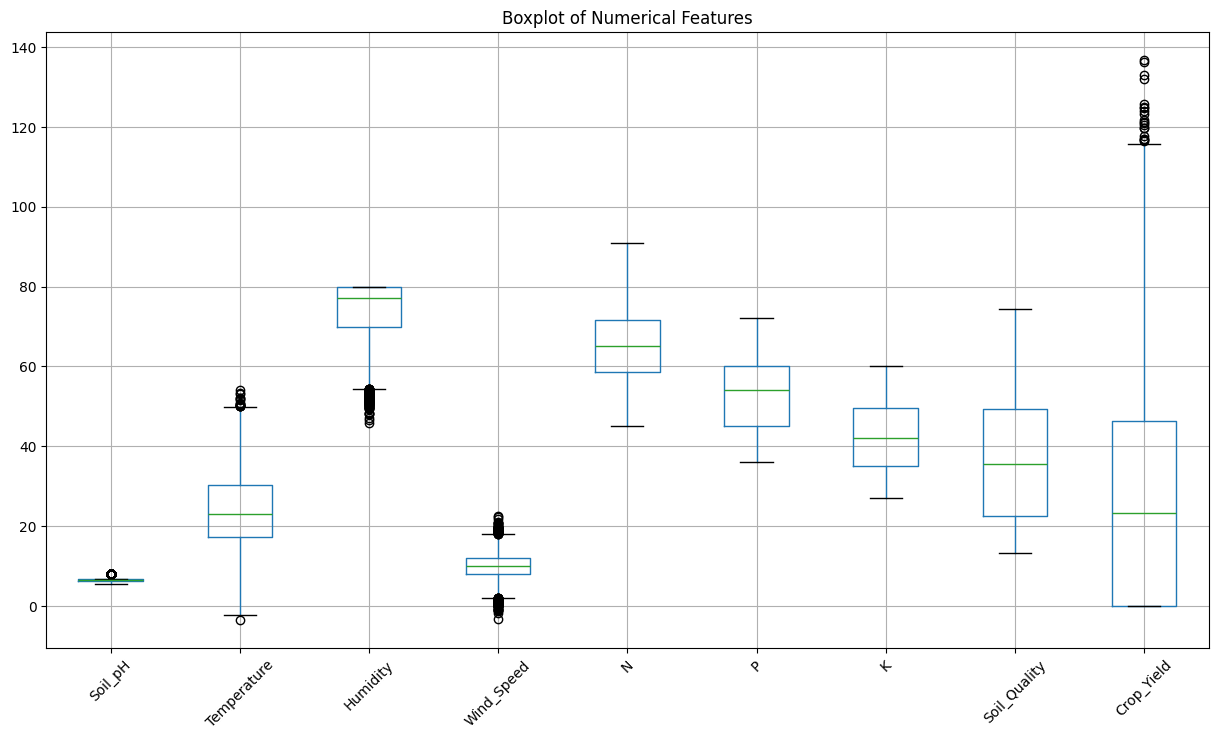

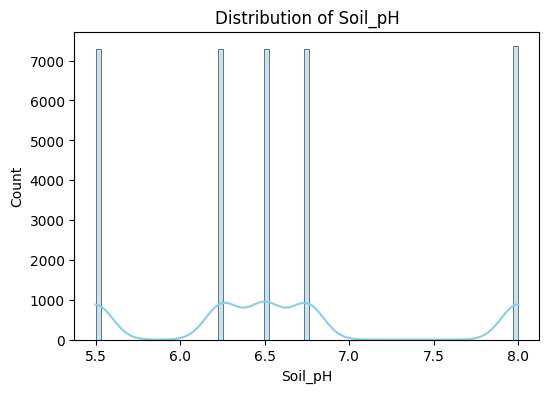

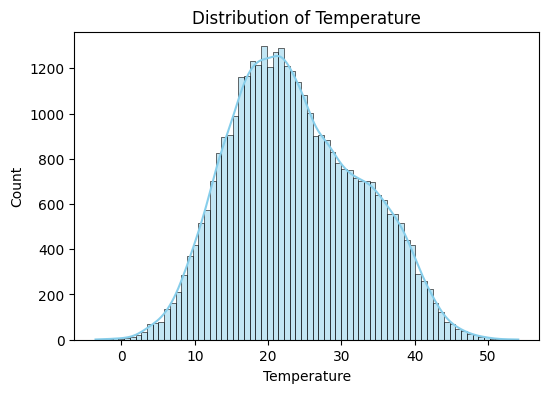

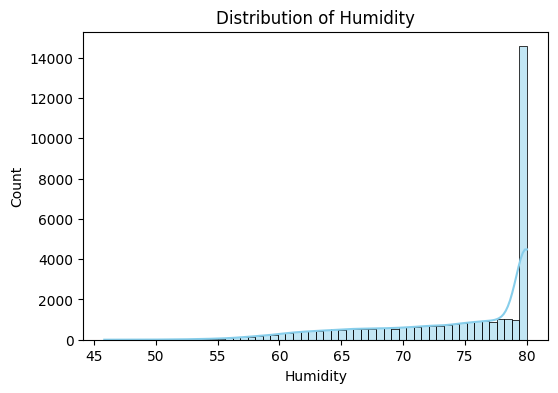

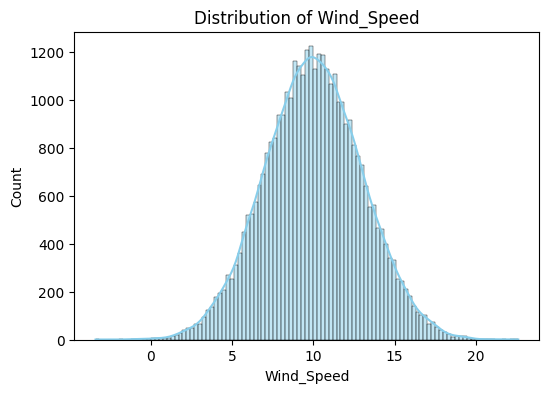

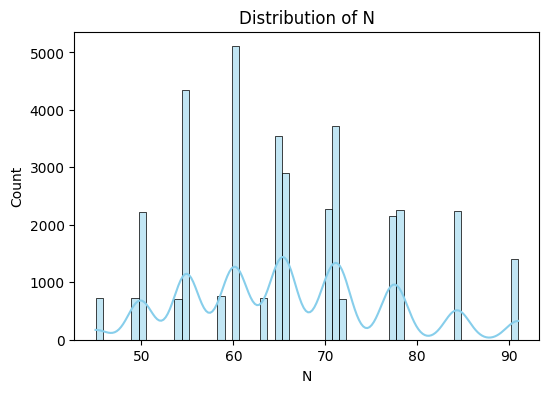

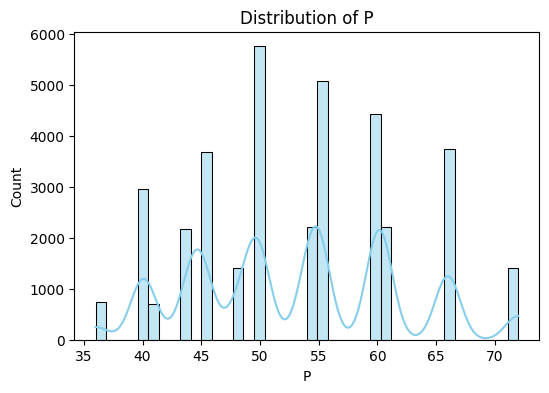

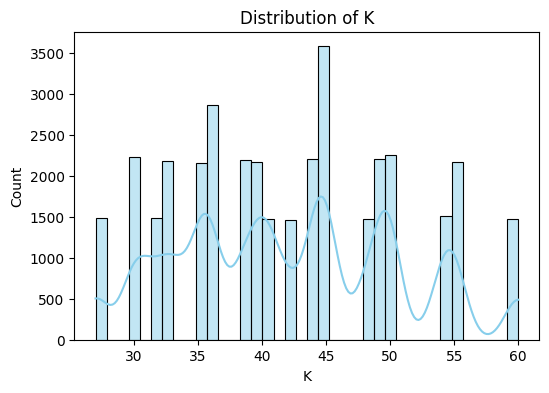

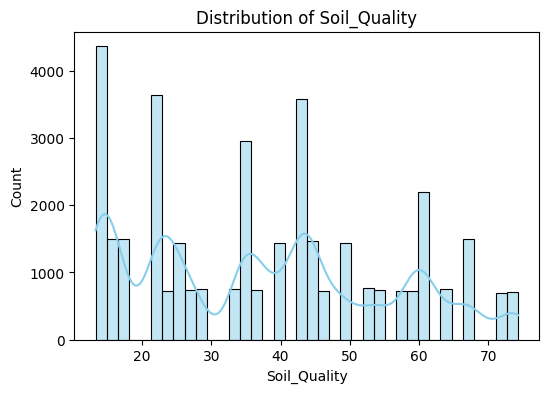

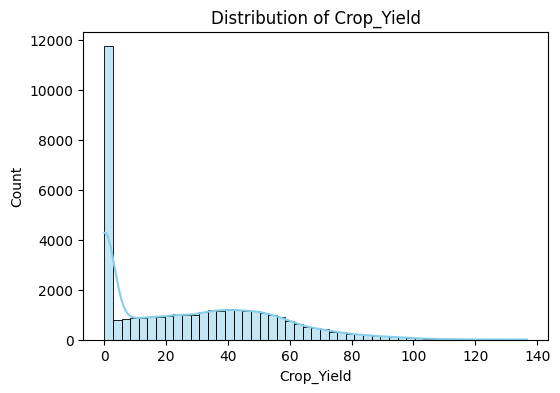

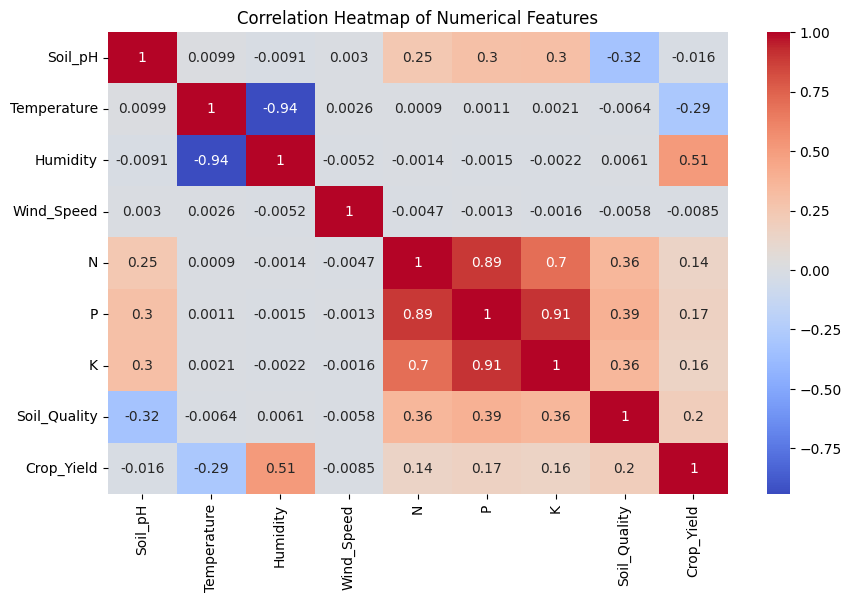

In [ ]:
numerical_cols = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality', 'Crop_Yield']

plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
# Label Encoding for Crop_Type and Soil_Type
le = LabelEncoder()
df_label = df.copy()

df_label['Crop_Type'] = le.fit_transform(df_label['Crop_Type'])
df_label['Soil_Type'] = le.fit_transform(df_label['Soil_Type'])

print("✅ Label Encoding Completed")
df_label.head()


✅ Label Encoding Completed


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,9,2,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,1,1,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,4,2,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,0,4,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,5,2,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


count    36520.000000
mean        37.516632
std         17.703171
min         13.291667
25%         22.500000
50%         35.583333
75%         49.291667
max         74.333333
Name: Soil_Quality, dtype: float64

✅ Soil_Quality categorized into bins:
   Soil_Quality Soil_Quality_Binned
0     22.833333                 Low
1     66.666667                High
2     27.333333                 Low
3     35.000000              Medium
4     22.166667                 Low
5     39.375000              Medium
6     17.041667                 Low
7     42.291667              Medium
8     22.833333                 Low
9     63.666667                High

✅ Ordinal Encoding Completed Successfully!


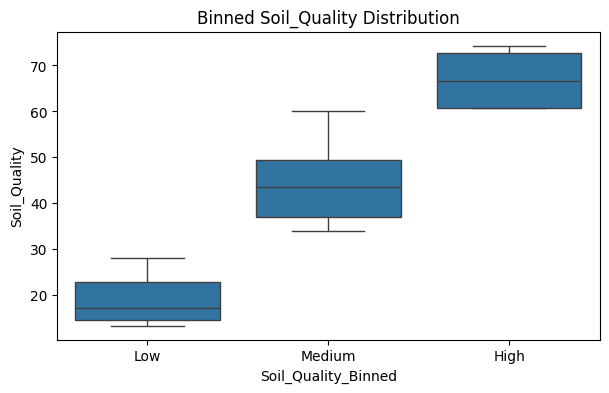

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

df_ordinal = df.copy()

print(df_ordinal['Soil_Quality'].describe())

# (3 bins = Low, Medium, High)
bins = [df_ordinal['Soil_Quality'].min()-1, 33, 60, df_ordinal['Soil_Quality'].max()+1]
labels = ['Low', 'Medium', 'High']

df_ordinal['Soil_Quality_Binned'] = pd.cut(df_ordinal['Soil_Quality'], bins=bins, labels=labels)

print("\n Soil_Quality categorized into bins:")
print(df_ordinal[['Soil_Quality', 'Soil_Quality_Binned']].head(10))

# Apply Ordinal Encoding
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df_ordinal['Soil_Quality_Encoded'] = ordinal_encoder.fit_transform(df_ordinal[['Soil_Quality_Binned']])

print("\n Ordinal Encoding Completed Successfully!")
df_ordinal[['Soil_Quality', 'Soil_Quality_Binned', 'Soil_Quality_Encoded']].head(10)

plt.figure(figsize=(7,4))
sns.boxplot(x='Soil_Quality_Binned', y='Soil_Quality', data=df_ordinal)
plt.title("Binned Soil_Quality Distribution")
plt.show()


In [ ]:
df_target = df.copy()
df_target['Crop_Type'] = df_target.groupby('Crop_Type')['Crop_Yield'].transform('mean')
df_target['Soil_Type'] = df_target.groupby('Soil_Type')['Crop_Yield'].transform('mean')

print("Target Encoding Completed")
df_target.head()


✅ Target Encoding Completed


,Date,Crop_Type,Soil_Type,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,25.871497,21.992942,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,28.330560,36.523071,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,28.688229,21.992942,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,25.552846,23.199531,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,25.932047,21.992942,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
encoder = ce.BinaryEncoder(cols=['Crop_Type', 'Soil_Type'])
df_binary = encoder.fit_transform(df)

print("Binary Encoding Completed")
df_binary.head()


✅ Binary Encoding Completed


,Date,Crop_Type_0,Crop_Type_1,Crop_Type_2,Crop_Type_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_pH,Temperature,Humidity,Wind_Speed,N,P,K,Crop_Yield,Soil_Quality
0,2014-01-01,0,0,0,1,0,0,1,5.50,9.440599,80.000000,10.956707,60.5,45.0,31.5,0.000000,22.833333
1,2014-01-01,0,0,1,0,0,1,0,6.50,20.052576,79.947424,8.591577,84.0,66.0,50.0,104.871310,66.666667
2,2014-01-01,0,0,1,1,0,0,1,5.50,12.143099,80.000000,7.227751,71.5,54.0,38.5,0.000000,27.333333
3,2014-01-01,0,1,0,0,0,1,1,6.75,19.751848,80.000000,2.682683,50.0,40.0,30.0,58.939796,35.000000
4,2014-01-01,0,1,0,1,0,0,1,5.50,16.110395,80.000000,7.696070,49.5,45.0,38.5,32.970413,22.166667


In [ ]:
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler()
}

numerical_features = ['Soil_pH', 'Temperature', 'Humidity', 'Wind_Speed', 'N', 'P', 'K', 'Soil_Quality']

scaled_dfs = {}

for name, scaler in scalers.items():
    df_scaled = df.copy()
    df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])
    scaled_dfs[name] = df_scaled
    print(f"✅ {name} Applied")


✅ MinMaxScaler Applied
✅ StandardScaler Applied
✅ RobustScaler Applied


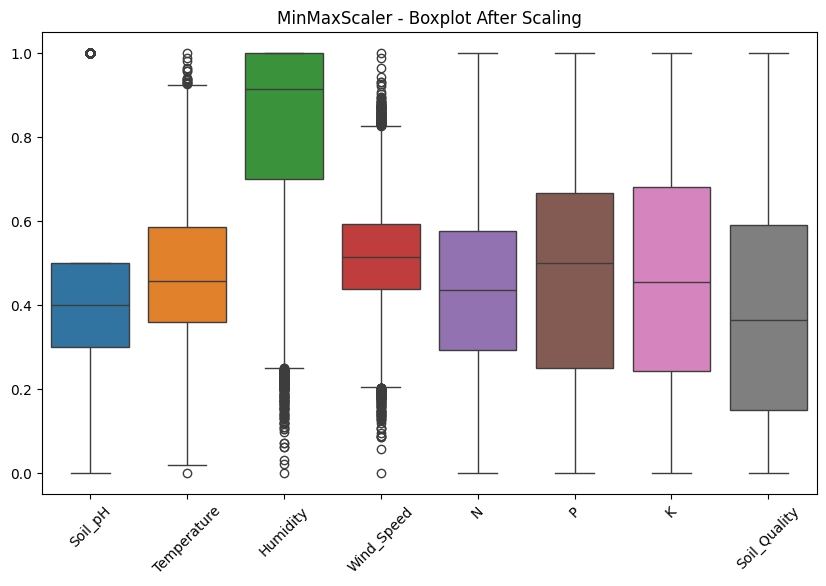

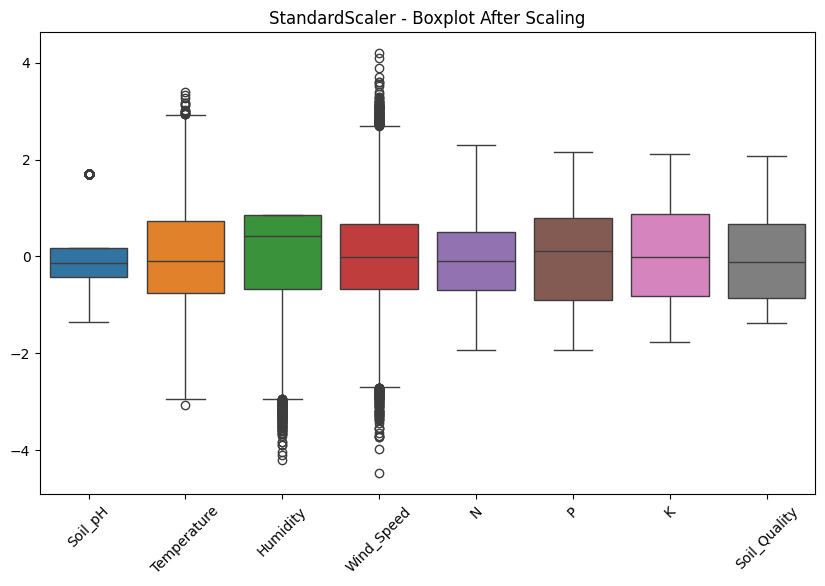

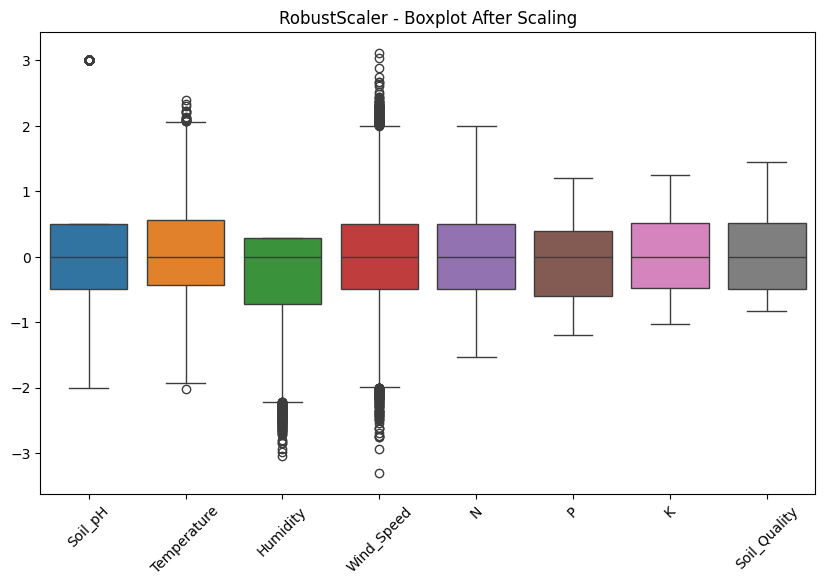

In [ ]:
# Compare distributions after scaling
for name, df_scaled in scaled_dfs.items():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_scaled[numerical_features])
    plt.title(f"{name} - Boxplot After Scaling")
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
df_label.to_csv('/content/preprocessed_label_encoding.csv', index=False)
df_ordinal.to_csv('/content/preprocessed_ordinal_encoding.csv', index=False)
df_target.to_csv('/content/preprocessed_target_encoding.csv', index=False)
df_binary.to_csv('/content/preprocessed_binary_encoding.csv', index=False)

for name, df_scaled in scaled_dfs.items():
    df_scaled.to_csv(f'/content/preprocessed_{name}.csv', index=False)

print("All preprocessed datasets saved successfully!")


✅ All preprocessed datasets saved successfully!
